# Plotting sequence length and GC content
Here we will show some more examples of sequence parsing, using the Bio.SeqIO module described in one of the previous videos, plus the Python library matplotlib’s pylab plotting interface 

### Get data

In [1]:
!wget https://raw.githubusercontent.com/biopython/biopython/master/Doc/examples/ls_orchid.fasta

--2021-12-12 18:26:49--  https://raw.githubusercontent.com/biopython/biopython/master/Doc/examples/ls_orchid.fasta
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 76480 (75K) [text/plain]
Saving to: ‘ls_orchid.fasta’

ls_orchid.fasta     100%[===================>]  74,69K  --.-KB/s    in 0,03s   

2021-12-12 18:26:49 (2,82 MB/s) - ‘ls_orchid.fasta’ saved [76480/76480]



### Parse FASTA file

In [4]:
from Bio import SeqIO

sequences = []
for seq_record in SeqIO.parse("ls_orchid.fasta", "fasta"):
    sequences.append(seq_record.seq)

In [5]:
sequences

[Seq('CGTAACAAGGTTTCCGTAGGTGAACCTGCGGAAGGATCATTGATGAGACCGTGG...CGC'),
 Seq('CGTAACAAGGTTTCCGTAGGTGAACCTGCGGAAGGATCATTGTTGAGACAACAG...GGC'),
 Seq('CGTAACAAGGTTTCCGTAGGTGAACCTGCGGAAGGATCATTGTTGAGACAGCAG...TAA'),
 Seq('CGTAACAAGGTTTCCGTAGGTGAACCTGCGGAAGGATCATTGTTGAAACAACAT...CAT'),
 Seq('ACGGCGAGCTGCCGAAGGACATTGTTGAGACAGCAGAATATACGATTGAGTGAA...AAA'),
 Seq('CGTAACAAGGTTTCCGTAGGTGAACCTGCGGAAGGATCATTGTTGAGACAGTAG...CCC'),
 Seq('CGTAACAAGGTTTCCGTAGGTGAACCTGCGGAAGGATCATTGTTGAGACAGTAG...TGT'),
 Seq('TGTTGAGATAGCAGAATATACATCGAGTGAATCCGGAGGACCTGTGGTTATTCG...GCA'),
 Seq('CGTAACAAGGTTTCCGTAGGTGAACCTGCGGAAGGATCATTGTTGAGATAGTAG...AGC'),
 Seq('CGTAACCAGGTTTCCGTAGGTGAACCTGCGGCAGGATCATTGTTGAGACAGCAG...AAG'),
 Seq('CGTAACAAGGTTTCCGTAGGTGAACCTGCGGAAGGATCATTGTTGAGACAGCAG...GAG'),
 Seq('GTAGGTGAACCTGCGGAAGGATCATTGTTGAGACAGTAGAATATATGATCGAGT...ACC'),
 Seq('CGTAACAAGGTTTCCGTAGGTGAACCTGCGGAAGGATCATTGTTGAGACAGCAG...TTT'),
 Seq('ATATGATCGAGTGAATCTGGTGGACTTGTGGTTACTCAGCTCGCCATAGGCTTT...TTA'),
 Seq('CGTAACAAGGTTTC

### Histogram of sequence lengths

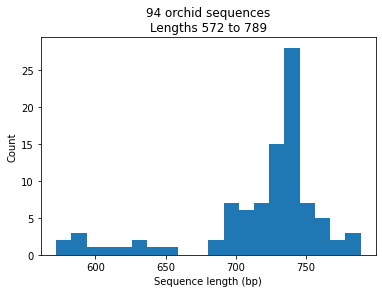

In [10]:
sizes = [len(rec) for rec in sequences]

import matplotlib.pyplot as plt
plt.hist(sizes, bins=20)
plt.title(f"{len(sizes)} orchid sequences\nLengths {min(sizes)} to {max(sizes)}")
plt.xlabel("Sequence length (bp)")
plt.ylabel("Count")
plt.show()

Notice that most of these orchid sequences are about 740 bp long!

### Plot of sequence GC%
Having read in each sequence and calculated the GC%, we will sort them into ascending order.

In [12]:
from Bio.SeqUtils import GC
gc_values = sorted(GC(rec) for rec in sequences)

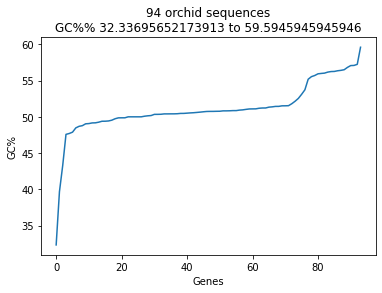

In [14]:
plt.plot(gc_values)
plt.title(f"{len(gc_values)} orchid sequences\nGC%% {min(gc_values)} to {max(gc_values)}")
plt.xlabel("Genes")
plt.ylabel("GC%")
plt.show()